In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
# Implemented DecisionTree 
from DecisionTree import DecisionTree

In [193]:
def data_analysis(data):
    
    # The shape of the data
    print('The shape of the data set:')
    print(f"The data set consists of {data.shape[0]} rows and {data.shape[1]} columns.")
    
    print('\n***********************************************')
    # Missing Values Check
    print('The existence of missing values in each column:')
    print(data.isnull().any())
    
    print('\n***********************************************')
    # Info of the data
    print('General information about the data:')
    print(data.info())
    
    print('\n***********************************************')
    # Number of unique values in each column
    print('The number of unique values in each column:')
    print(data.nunique())
    
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))
 
 # Function to plot the confusion matrix:
def cmatrix_fun(model_name, actual, predicted, color):
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=color)

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])  
    
def accuracy(y_test, y_pred):
        return np.sum(y_test == y_pred) / len(y_test)    

In [194]:
df = pd.read_csv('cardio_train.csv', delimiter=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [195]:
data_analysis(df)

The shape of the data set:
The data set consists of 70000 rows and 13 columns.

***********************************************
The existence of missing values in each column:
id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

***********************************************
General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_l

In [196]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [198]:
# drop id col as it is not critical or benificial
df = df.drop('id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [199]:
# age is in days -> change it to years
df['age'] = round(df['age'] / 365, 3)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.392,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282,2,169,82.0,150,100,1,1,0,0,1,1
4,47.874,1,156,56.0,100,60,1,1,0,0,0,0


<AxesSubplot:ylabel='cardio'>

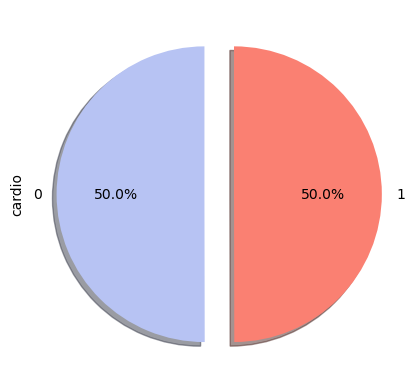

In [200]:
#visualizing in Pie chart of target
df['cardio'].value_counts().plot.pie( autopct='%1.1f%%', startangle = 90,  shadow=True, explode=[0.1,0.1], colors=['#B7C3F3','salmon'])

In [201]:
X = df.drop("cardio", axis = 1)
y = df['cardio']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.shape, X_test.shape

((56000, 11), (14000, 11))

In [203]:
scaler = StandardScaler()

# fit the modeling features to the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((56000, 11), (14000, 11))

In [204]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [205]:
dt.score(X_train, y_train)*100 

99.97142857142856

In [206]:
dt.score(X_test, y_test)*100

63.6

#### We notice the great overfitting in the model

## Find the best depth (Tunning):

In [207]:
max_depth_list = [3, 4, 5, 6, 7 , 8]
for i in max_depth_list:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc_dict = {"Train": round(dt.score(X_train, y_train)*100,2) , 'Test': round(dt.score(X_test, y_test)*100,2)}
    print(f"At depth = {i}, The Acc {acc_dict}")

At depth = 3, The Acc {'Train': 72.59, 'Test': 72.55}
At depth = 4, The Acc {'Train': 73.04, 'Test': 72.64}
At depth = 5, The Acc {'Train': 73.28, 'Test': 72.89}
At depth = 6, The Acc {'Train': 73.5, 'Test': 72.94}
At depth = 7, The Acc {'Train': 73.86, 'Test': 72.86}
At depth = 8, The Acc {'Train': 74.26, 'Test': 72.69}


In [208]:
max_depth_list = ["gini" , "entropy"]
for i in max_depth_list:
    dt = DecisionTreeClassifier(max_depth=7, criterion = i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc_dict = {"Train": round(dt.score(X_train, y_train)*100,2) , 'Test': round(dt.score(X_test, y_test)*100,2)}
    print(f"At depth = {i}, The Acc {acc_dict}")

At depth = gini, The Acc {'Train': 73.86, 'Test': 72.85}
At depth = entropy, The Acc {'Train': 73.81, 'Test': 73.17}


In [209]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

#### Train & Test Acc:

In [210]:
acc_dict = {"Train": round(dt.score(X_train, y_train)*100,2) , 'Test': round(dt.score(X_test, y_test)*100,2)}
acc_dict

{'Train': 73.81, 'Test': 73.17}

#### Metrics:

In [211]:
classification_report_fun("Decision Tree", y_test, y_pred) 

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7110
           1       0.76      0.67      0.71      6890

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



[[5649 1461]
 [2295 4595]]


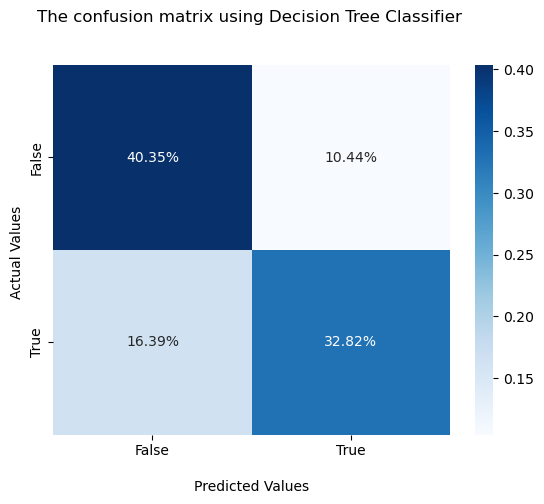

In [212]:
cmatrix_fun("Decision Tree", y_test, y_pred, "Blues")

## Implemented DT:

In [213]:
dt_implement = DecisionTree()

dt_implement.fit(X_train, y_train)

y_pred_implemented = dt_implement.predict(X_test)
y_pred_implemented

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 None,
 1,
 1,
 0,
 0,
 None,
 0,
 0,
 1,
 1,
 None,
 1,
 None,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 None,
 1,
 0,
 None,
 0,
 None,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 None,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 None,
 0,
 0,
 1,
 0,
 None,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 None,
 None,
 1,
 None,
 0,
 0,
 0,
 1,
 0,
 None,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 None,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 None,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 None,
 0,
 0,
 None,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 None,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 None,
 None,
 None,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 None,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 None,
 0,
 1,
 0,
 1,
 0,
 0,


In [214]:
round(accuracy(y_pred_implemented, y_test)*100, 2)

58.21

In [215]:
max_depth_list = [3, 4, 5, 6, 7 , 8]
for i in max_depth_list:
    dt = DecisionTree(max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc_dict = round(accuracy(y_pred, y_test)*100, 2)
    print(f"At depth = {i}, The Acc {acc_dict}")

At depth = 3, The Acc 58.64
At depth = 4, The Acc 58.21
At depth = 5, The Acc 58.21
At depth = 6, The Acc 58.21
At depth = 7, The Acc 58.21
At depth = 8, The Acc 58.21


## remove the null values in prediction:

In [216]:
result_pred_imp = pd.DataFrame({'Predictions':y_pred_implemented, 'Actual':y_test})
result_pred_imp

,Predictions,Actual
27504,1.0,1
57935,0.0,0
40387,0.0,1
24455,1.0,1
66362,0.0,0
...,...,...
17389,0.0,0
31340,1.0,1
7744,1.0,1
54732,0.0,0


In [217]:
result_pred_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 27504 to 21496
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Predictions  12318 non-null  float64
 1   Actual       14000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 328.1 KB


In [218]:
result_pred_imp.isnull().sum()

Predictions    1682
Actual            0
dtype: int64

In [219]:
fill_list = result_pred_imp['Predictions'].dropna().tolist()
result_pred_imp['Predictions'] = result_pred_imp['Predictions'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [220]:
result_pred_imp.isnull().sum()

Predictions    0
Actual         0
dtype: int64

#### acc after removing the null value:

In [221]:
round(accuracy(result_pred_imp['Predictions'], y_test)*100, 2)

64.29

In [222]:
classification_report_fun("Decision Tree", y_test, result_pred_imp['Predictions']) 

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      7110
           1       0.64      0.62      0.63      6890

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



[[4753 2357]
 [2642 4248]]


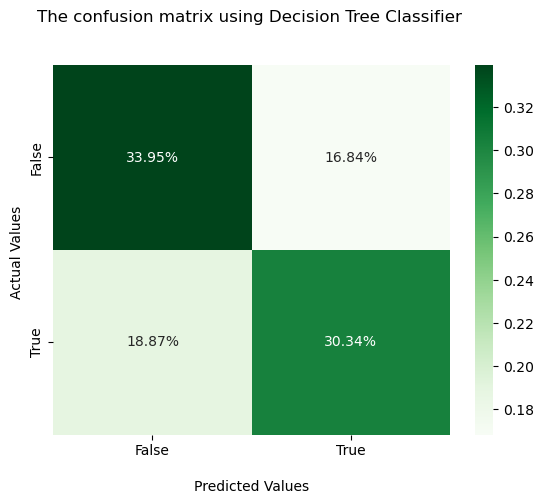

In [223]:
cmatrix_fun("Decision Tree", y_test, result_pred_imp['Predictions'], 'Greens')

# 2. Student table

In [224]:
student = {'EarlyRegistration':[1,1,0,0,0,0,1,0,0,1,1,0,0,1], 'Finishedhomework2':[1,1,0,1,1,0,0,1,0,0,1,1,0,0],'Senior':[0,1,1,1,1,1,0,0,1,0,1,1,0,0],'LikesCoffee':[0,0,0,0,0,1,0,1,0,0,0,1,0,1],'LikedTheLasthomework':[1,1,0,1,0,1,1,1,1,0,0,1,1,0],'A':[1,1,0,0,1,1,0,1,1,0,1,0,0,1]}  
student_df = pd.DataFrame(student) 
student_df

,EarlyRegistration,Finishedhomework2,Senior,LikesCoffee,LikedTheLasthomework,A
0,1,1,0,0,1,1
1,1,1,1,0,1,1
2,0,0,1,0,0,0
3,0,1,1,0,1,0
4,0,1,1,0,0,1
5,0,0,1,1,1,1
6,1,0,0,0,1,0
7,0,1,0,1,1,1
8,0,0,1,0,1,1
9,1,0,0,0,0,0


In [225]:
x = student_df.drop('A', axis=1)
y = student_df['A']

In [226]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x, y, test_size = 0.1, random_state = 0)
x_train_s

,EarlyRegistration,Finishedhomework2,Senior,LikesCoffee,LikedTheLasthomework
4,0,1,1,0,0
11,0,1,1,1,1
2,0,0,1,0,0
13,1,0,0,1,0
9,1,0,0,0,0
1,1,1,1,0,1
7,0,1,0,1,1
10,1,1,1,0,0
3,0,1,1,0,1
0,1,1,0,0,1


In [227]:
max_depth_list = [1, 2, 3, 4, 5, 6, 7 , 8]
for i in max_depth_list:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train_s, y_train_s)
    y_pred = dt.predict(x_test_s)
    acc_dict = {"Train": round(dt.score(x_train_s, y_train_s)*100,2) , 'Test': round(dt.score(x_test_s, y_test_s)*100,2)}
    print(f"At depth = {i}, The Acc {acc_dict}")

At depth = 1, The Acc {'Train': 66.67, 'Test': 0.0}
At depth = 2, The Acc {'Train': 75.0, 'Test': 50.0}
At depth = 3, The Acc {'Train': 83.33, 'Test': 50.0}
At depth = 4, The Acc {'Train': 100.0, 'Test': 50.0}
At depth = 5, The Acc {'Train': 100.0, 'Test': 50.0}
At depth = 6, The Acc {'Train': 100.0, 'Test': 50.0}
At depth = 7, The Acc {'Train': 100.0, 'Test': 50.0}
At depth = 8, The Acc {'Train': 100.0, 'Test': 50.0}


In [228]:
max_depth_list = ["gini" , "entropy"]
for i in max_depth_list:
    dt = DecisionTreeClassifier(criterion = i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc_dict = {"Train": round(dt.score(X_train, y_train)*100,2) , 'Test': round(dt.score(X_test, y_test)*100,2)}
    print(f"At depth = {i}, The Acc {acc_dict}")

At depth = gini, The Acc {'Train': 99.97, 'Test': 63.65}
At depth = entropy, The Acc {'Train': 99.97, 'Test': 63.85}


In [229]:
dt_student = DecisionTreeClassifier(criterion = "entropy", max_depth=2)

dt_student.fit(x_train_s,y_train_s)
y_pred_s = dt_student.predict(x_test_s)

In [230]:
acc_dict_student = {"Train": round(dt_student.score(x_train_s, y_train_s)*100,2) , 'Test': round(dt_student.score(x_test_s, y_test_s)*100,2)}
acc_dict_student

{'Train': 75.0, 'Test': 50.0}

[[1 0]
 [1 0]]


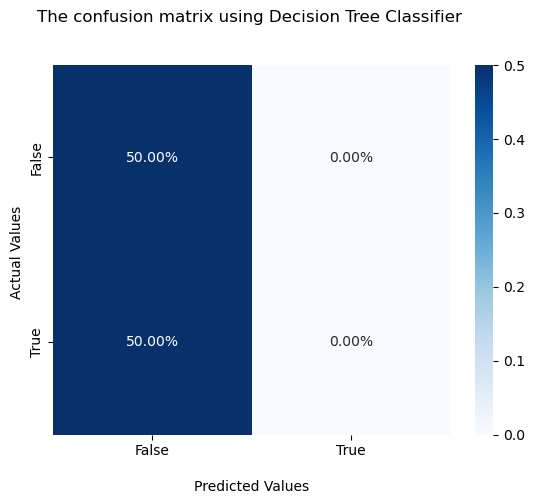

In [231]:
cmatrix_fun("Decision Tree", y_test_s, y_pred_s, "Blues")

In [232]:
# dt_implement_s = DecisionTree()

# dt_implement_s.fit(x_train_s, x_train_s)

# y_pred_implemented_s = dt_implement.predict(x_test_s)
# y_pred_implemented_s

In [233]:
# round(accuracy(y_pred_implemented_s, y_test_s)*100, 2)